In [1]:
import numpy as np # scientific computaion
import pandas as pd # loading dataset file
import matplotlib.pyplot as plt # visuligation
import nltk # preprocessing our text
from nltk.corpus import stopwords # removing all the stop words
from nltk.stem.porter import PorterStemmer # stemming of wo

In [2]:
df=pd.read_csv("/content/spam.csv",encoding="latin")

In [3]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.rename({"v1":"lable","v2":"text"},inplace=True,axis=1)

In [7]:
df.tail()

,lable,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
from sklearn.model_selection import train_test_split

 

In [9]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
True

True

In [10]:

import nltk
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

In [11]:
import re
corpus=[]
length = len(df)

In [12]:
corpus

[]

In [13]:
df.describe()

,lable,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [14]:
df.shape

(5572, 5)

In [15]:
%%capture
!pip install -U sentence-transformers%%capture
!pip install -U sentence-transformers

In [16]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "true"

import random
import numpy as np
import pandas as pd
import charset_normalizer
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, ClassifierMixin
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

np.random.seed(99)
random.seed(99)

# setting the number of parallel jobs when applicable
n_jobs = 15

In [17]:
dataset_file = "/content/spam.csv"

# attempting to detect the csv file character encoding
with open(dataset_file, "rb") as csv:
    detected_encoding = charset_normalizer.detect(csv.read(250000))
    print(f"Detected encoding {detected_encoding['encoding']} with confidence level of {detected_encoding['confidence']}"
    )

df = pd.read_csv(dataset_file, encoding=detected_encoding["encoding"])
df = df.loc[:, ["v1", "v2"]]
df.info()

Detected encoding windows-1250 with confidence level of 1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


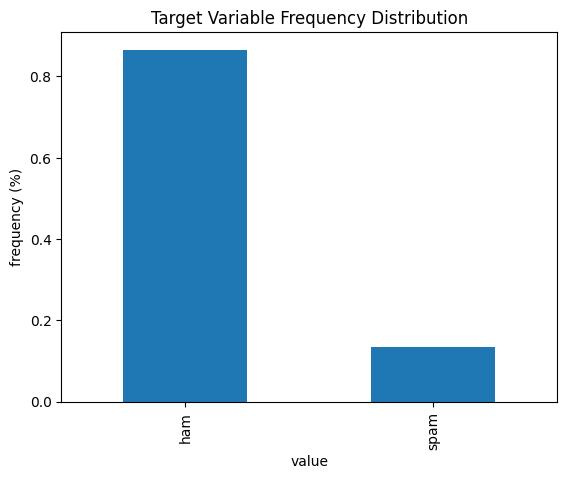

In [19]:
df["v1"].value_counts(normalize=True).plot(
    title="Target Variable Frequency Distribution",
    kind="bar",
    xlabel="value",
    ylabel="frequency (%)",
)
plt.show()

In [20]:
binarizer = LabelBinarizer()
df["target"] = binarizer.fit_transform(df["v1"].values)

In [21]:
transformer = SentenceTransformer("all-mpnet-base-v2")
embeddings = transformer.encode(df["v2"], show_progress_bar=False)
print(embeddings.shape)

(5572, 768)


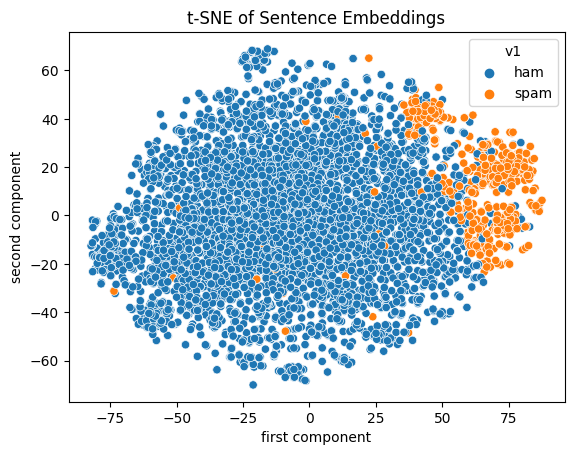

In [22]:
tsne = TSNE(random_state=99)
converted = tsne.fit_transform(embeddings)
plt.title("t-SNE of Sentence Embeddings")
sns.scatterplot(x=converted[:, 0], y=converted[:, 1], hue=df["v1"])
plt.xlabel("first component")
plt.ylabel("second component")
plt.show()

In [23]:
y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, y, test_size=0.25, shuffle=True, stratify=y, random_state=99
)
print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}")

X_train: (4179, 768)
X_test: (1393, 768)


In [24]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
auc = np.round(roc_auc_score(y_test, y_pred), 3)
print(f"Test ROC AUC: {auc}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Test ROC AUC: 0.965

Confusion Matrix:
[[1206    0]
 [  13  174]]


In [ ]:
cv = GridSearchCV(
    estimator=SVC(kernel="rbf"),
    param_grid={
        "C": [0.1, 1, 10, 100, 1000],
        "gamma": [
            1,
            0.1,
            0.01,
            0.001,
            0.0001,
            1 / X_train.shape[1],
            1 / (X_train.shape[1] * X_train.var()),
        ],
        "kernel": ["rbf", "linear"],
    },
    n_jobs=n_jobs,
    scoring="roc_auc",
    cv=5,
)

cv.fit(X_train, y_train)
print(f"CV Best ROC AUC: {np.round(cv.best_score_, 3)}")
y_pred = cv.best_estimator_.predict(X_test)
auc = np.round(roc_auc_score(y_test, y_pred), 3)
print(f"Test ROC AUC: {auc}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Best params:\n{cv.best_params_}")

CV Best ROC AUC: 0.998
Test ROC AUC: 0.968

Confusion Matrix:
[[1206    0]
 [  12  175]]

Best params:
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
class SMSSpamDetector(BaseEstimator, ClassifierMixin):
    def __init__(self):
        super().__init__()
        self.model = SVC(kernel="rbf", C=10, gamma=1)
        self.label_binarizer = LabelBinarizer()
        self.sentence_transformer = SentenceTransformer("all-mpnet-base-v2")

    def fit(self, X, y):
        _X = self.sentence_transformer.encode(X.ravel()).reshape(X.shape[0], -1)
        _y = self.label_binarizer.fit_transform(y)
        self.model.fit(_X, _y)
        return self
    
    def predict(self, X):
        _X = self.sentence_transformer.encode(X.ravel()).reshape(X.shape[0], -1)
        return self.label_binarizer.inverse_transform(self.model.predict(_X))

In [ ]:
# train the production model with the entire dataset
detector = SMSSpamDetector().fit(df["v2"].values, df["v1"].values)

In [ ]:
# dump to model.joblib file
# joblib.dump(detector, "model.joblib")